# Correlation ANN Classification Model

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 33.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Confusion Matrix:
 [[20  1]
 [ 6  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85        21
           1       0.67      0.25      0.36         8

    accuracy                           0.76        29
   macro avg       0.72      0.60      0.61        29
weighted avg       0.74      0.76      0.72        29

AUC-ROC: 0.8928571428571428


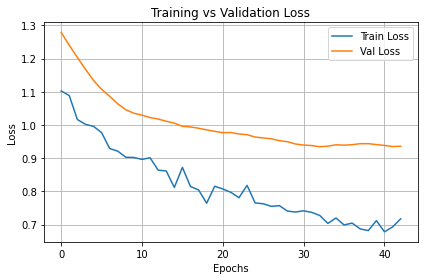

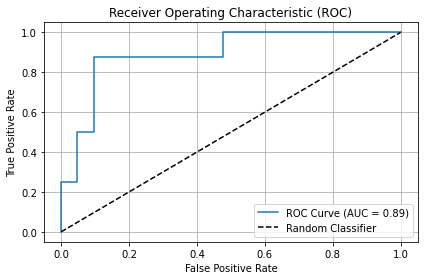

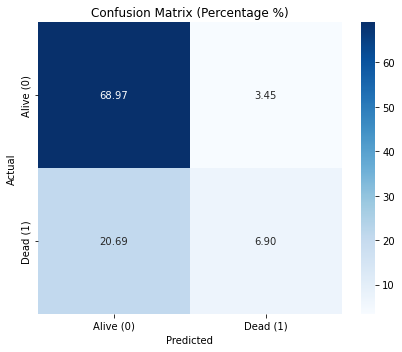

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
df = pd.read_csv('bdclean.csv')

# Features and target
features = ['PLAQ', 'SOFA', 'ALB', 'EDAD', 'Mean RR', 'DIAS UCIR',
            'Mean HR', 'SNS Index', 'Max HR', 'Peak Frequency LF']
target = 'Sobrevida'

# Drop missing
df = df[features + [target]].dropna()

# X and y
X = df[features].values
y = df[target].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Build ANN with L2 regularization
model = Sequential([
    Dense(16, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train_res.shape[1],)),
    Dropout(0.4),
    Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Train model
history = model.fit(
    X_train_res, y_train_res,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=0
)

# Predict
y_pred_prob = model.predict(X_test_scaled).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Print metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

# Plot: Training vs Validation Loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot: Confusion Matrix as Percentages
cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum() * 100  # Convert to percentage

plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Alive (0)', 'Dead (1)'],
            yticklabels=['Alive (0)', 'Dead (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage %)')
plt.tight_layout()
plt.show()


# Feature Importance ANN Clasification Models Analysis

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


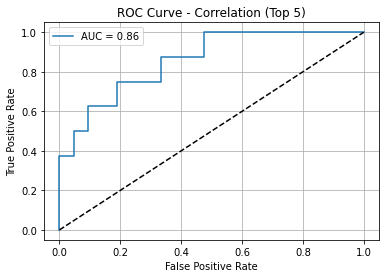

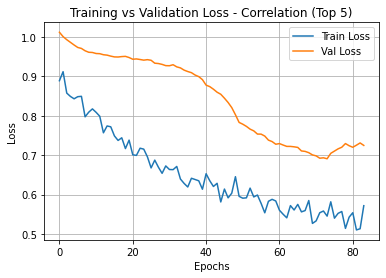

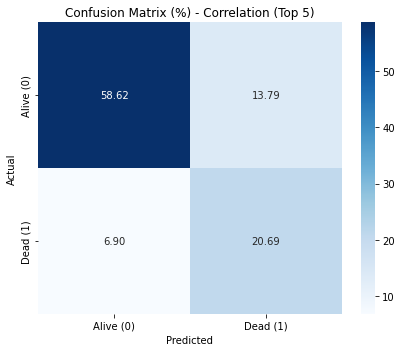

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


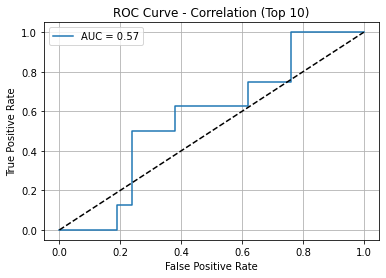

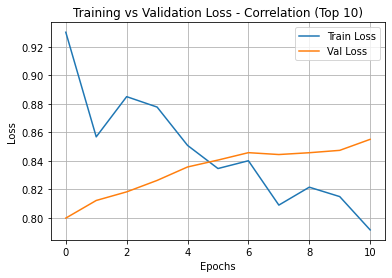

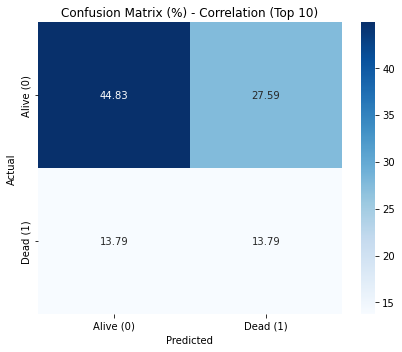

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


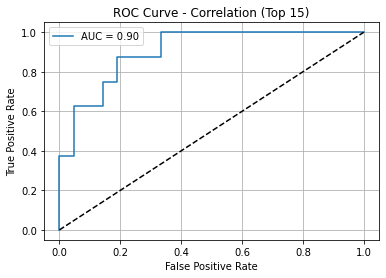

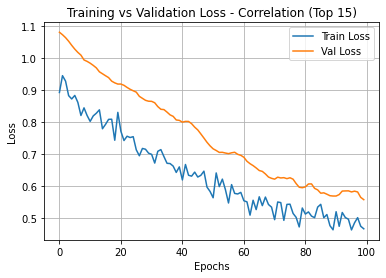

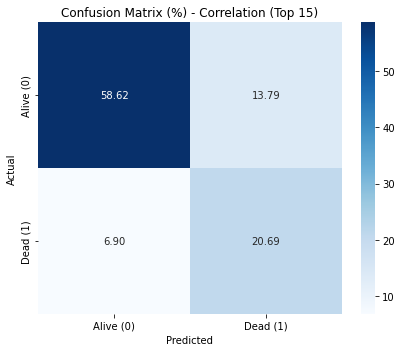

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


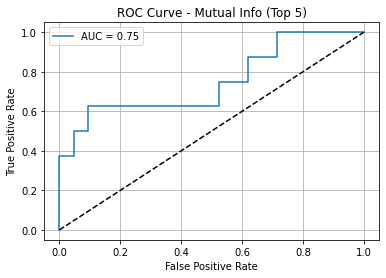

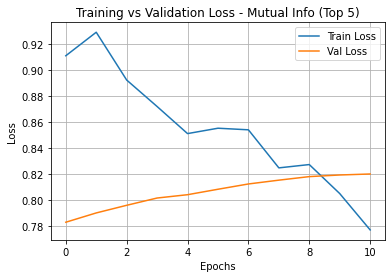

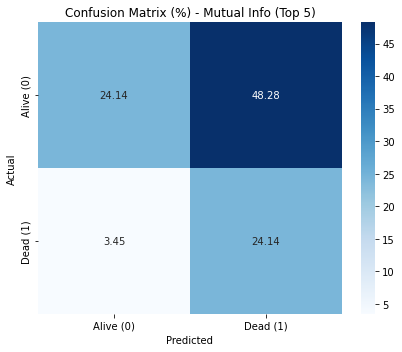

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


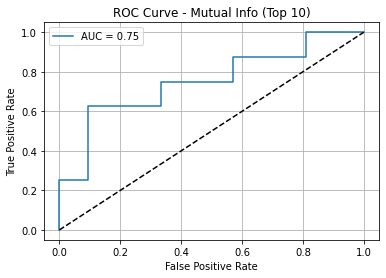

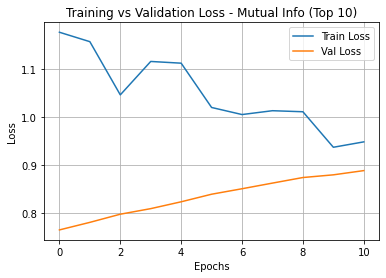

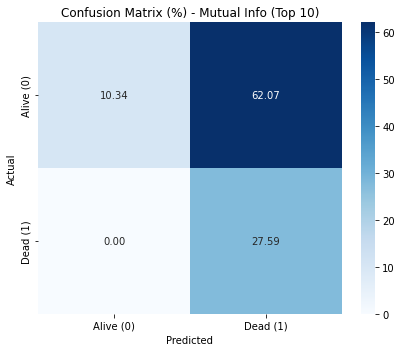

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


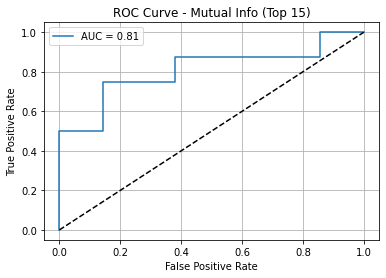

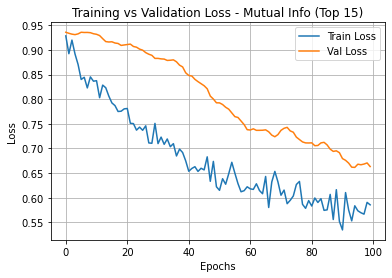

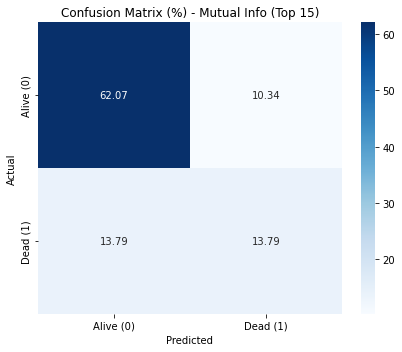

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


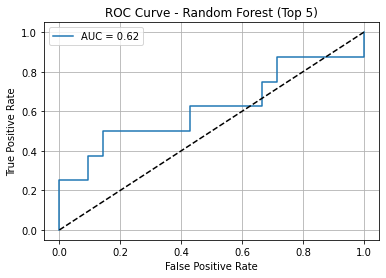

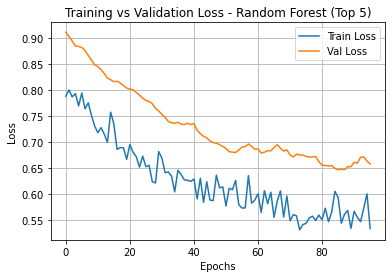

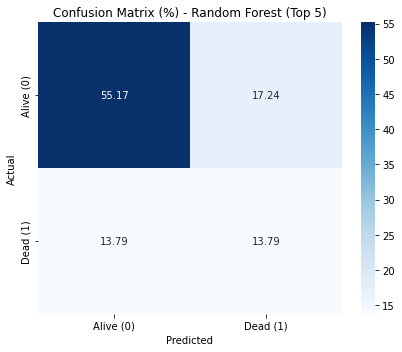

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


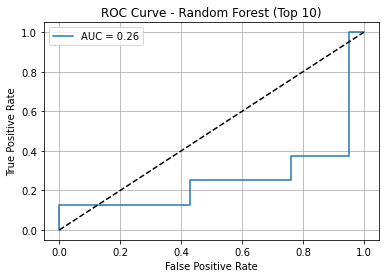

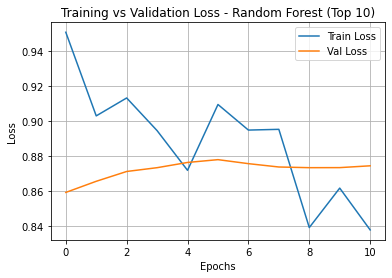

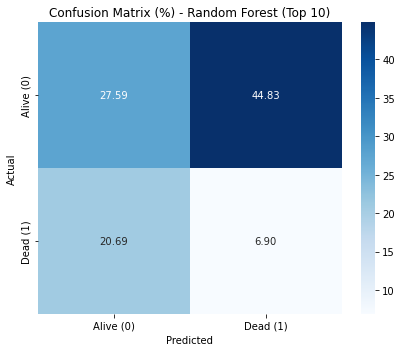

/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


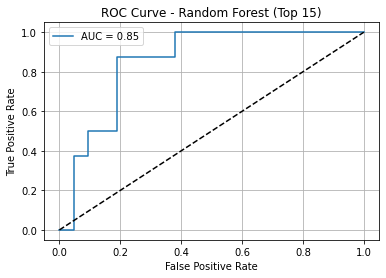

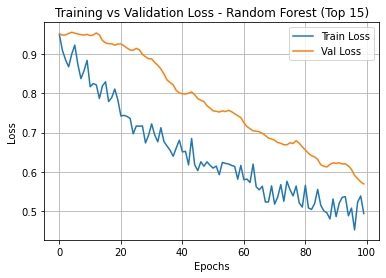

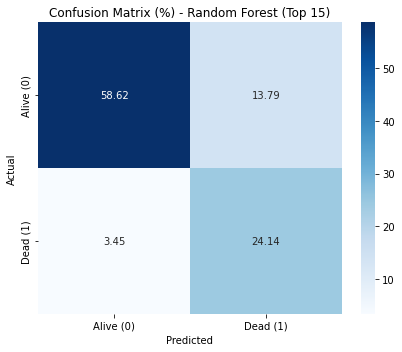


=== Comparison Report ===
                 Model      AUC  Precision  Recall  F1-Score
  Correlation (Top 15) 0.904762   0.600000   0.750  0.666667
   Correlation (Top 5) 0.857143   0.600000   0.750  0.666667
Random Forest (Top 15) 0.851190   0.636364   0.875  0.736842
  Mutual Info (Top 15) 0.809524   0.571429   0.500  0.533333
   Mutual Info (Top 5) 0.750000   0.333333   0.875  0.482759
  Mutual Info (Top 10) 0.750000   0.307692   1.000  0.470588
 Random Forest (Top 5) 0.619048   0.444444   0.500  0.470588
  Correlation (Top 10) 0.571429   0.333333   0.500  0.400000
Random Forest (Top 10) 0.255952   0.133333   0.250  0.173913


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load data
scores = pd.read_csv("scores.csv")
scores = scores.rename(columns={'Unnamed: 0': 'Feature'})
scores.set_index('Feature', inplace=True)

data = pd.read_csv("bdclean.csv")

# Prepare top N sets
methods = {
    "Correlation": scores['Correlation'].sort_values(ascending=False),
    "Mutual Info": scores['Mutual Info'].sort_values(ascending=False),
    "Random Forest": scores['Random Forest Importance'].sort_values(ascending=False)
}

top_counts = [5, 10, 15]
comparison_results = []

def run_ann(X, y, title):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

    model = Sequential([
        Dense(16, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
        Dropout(0.4),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
    history = model.fit(X_train, y_train, validation_split=0.2,
                        epochs=100, batch_size=16, callbacks=[early_stop], verbose=0)

    y_pred_prob = model.predict(X_test).ravel()
    y_pred = (y_pred_prob > 0.5).astype(int)

    auc = roc_auc_score(y_test, y_pred_prob)
    report = classification_report(y_test, y_pred, output_dict=True)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training vs Validation Loss - {title}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Confusion Matrix (percent)
    cm = confusion_matrix(y_test, y_pred)
    cm_percent = cm.astype('float') / cm.sum() * 100
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['Alive (0)', 'Dead (1)'],
                yticklabels=['Alive (0)', 'Dead (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (%) - {title}')
    plt.tight_layout()
    plt.show()

    return {
        'Model': title,
        'AUC': auc,
        'Precision': report['1']['precision'],
        'Recall': report['1']['recall'],
        'F1-Score': report['1']['f1-score']
    }

# Run for all methods and top counts
for method_name, series in methods.items():
    for top_n in top_counts:
        top_features = series.head(top_n).index.tolist()
        top_features = [f for f in top_features if f in data.columns]
        df = data[top_features + ['Sobrevida']].dropna()
        X = df[top_features].values
        y = df['Sobrevida'].values
        model_name = f"{method_name} (Top {top_n})"
        metrics = run_ann(X, y, model_name)
        comparison_results.append(metrics)

# Display Comparison Table
comparison_df = pd.DataFrame(comparison_results)
print("\n=== Comparison Report ===")
print(comparison_df.sort_values(by='AUC', ascending=False).to_string(index=False))


In [9]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import joblib

# Load your full dataset
df = pd.read_csv("bdclean.csv")

# Load scores.csv
scores = pd.read_csv("scores.csv")
scores = scores.rename(columns={"Unnamed: 0": "Feature"}).set_index("Feature")

# Top features
top_features = {
    'Correlation (Top 15)': scores['Correlation'].sort_values(ascending=False).head(15).index.tolist(),
    'Correlation (Top 5)': scores['Correlation'].sort_values(ascending=False).head(5).index.tolist(),
    'Random Forest (Top 15)': scores['Random Forest Importance'].sort_values(ascending=False).head(15).index.tolist(),
    'Mutual Info (Top 15)': scores['Mutual Info'].sort_values(ascending=False).head(15).index.tolist()
}

# Output path
os.makedirs("models", exist_ok=True)

def train_and_save(features, name):
    used = [f for f in features if f in df.columns]
    data = df[used + ['Sobrevida']].dropna()
    X = data[used].values
    y = data['Sobrevida'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    sm = SMOTE(random_state=42)
    X_train, y_train = sm.fit_resample(X_train, y_train)

    model = Sequential([
        Dense(16, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
        Dropout(0.4),
        Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, epochs=100, validation_split=0.2,
              batch_size=16, callbacks=[early_stop], verbose=0)

    model.save(f"models/{name}_model.h5")
    joblib.dump(scaler, f"models/{name}_scaler.pkl")
    with open(f"models/{name}_features.txt", "w") as f:
        f.write("\n".join(used))

# Train and save each model
for model_name, feat_list in top_features.items():
    clean_name = model_name.replace(" ", "_").replace("(", "").replace(")", "")
    train_and_save(feat_list, clean_name)


/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/home/lugo/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regulariz

# Logistic Regression Survival Models

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Load the data
df = pd.read_csv('bdclean.csv')

# Dictionary of feature sets
feature_sets = {
    'Correlation_Top_15': ['SOFA', 'PLAQ', 'ALB', 'DIAS UCIR', 'Max HR', 'EDAD', 'Mean HR', 'Mean RR', 'SNS Index', 'Peak Frequency LF', 'Peak Frequency VLF', 'pNN50', 'NN50', 'Leucos', 'CREAT'],
    'Correlation_Top_5': ['SOFA', 'PLAQ', 'ALB', 'DIAS UCIR', 'Max HR'],
    'Random_Forest_Top_15': ['PLAQ', 'CD4', 'CREAT', 'Min HR', 'SOFA', 'ALB', 'EDAD', 'DHL', 'PAFI', 'RMSSD', 'Peak Frequency HF', 'Mean RR', 'Power (%) VLF', 'PNS Index', 'DIAS UCIR'],
    'Mutual_Info_Top_15': ['SOFA', 'PLAQ', 'Max HR', 'Min HR', 'PNS Index', 'DFA Alpha2', 'CREAT', 'RMSSD', 'DFA Alpha1', 'Power (log) VLF', 'SD1', 'Peak Frequency HF', 'Power VLF', 'Mean RR', 'Mean HR']
}

# Store results
model_summaries = {}

for model_name, features in feature_sets.items():
    X = df[features]
    y = df['Sobrevida']

    # Combine X and y, drop rows with NaN or Inf
    data = pd.concat([X, y], axis=1)
    data = data.replace([np.inf, -np.inf], np.nan).dropna()

    X = data[features]
    y = data['Sobrevida']

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Add constant for statsmodels
    X_train_const = sm.add_constant(X_train_scaled)
    X_test_const = sm.add_constant(X_test_scaled)

    # Fit logistic regression using statsmodels
    logit_model = sm.Logit(y_train, X_train_const).fit(disp=0)

    # Predict probabilities and classes
    y_pred_prob = logit_model.predict(X_test_const)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Extract results
    summary = logit_model.summary().as_text()
    p_values = logit_model.pvalues
    odds_ratios = np.exp(logit_model.params)

    # Store everything
    model_summaries[model_name] = {
        'summary': summary,
        'p_values': p_values,
        'odds_ratios': odds_ratios,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1_score': f1,
        'auc': auc
    }

    # Print summary and metrics
    print(f"Model: {model_name}")
    print(summary)
    print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}")

Model: Correlation_Top_15
                           Logit Regression Results                           
Dep. Variable:              Sobrevida   No. Observations:                  108
Model:                          Logit   Df Residuals:                       92
Method:                           MLE   Df Model:                           15
Date:                Tue, 08 Jul 2025   Pseudo R-squ.:                  0.3469
Time:                        21:09:42   Log-Likelihood:                -41.035
converged:                       True   LL-Null:                       -62.832
Covariance Type:            nonrobust   LLR p-value:                 0.0001272
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6689      0.371     -4.499      0.000      -2.396      -0.942
x1             0.7883      0.338      2.330      0.020       0.125       1.451
x2            -0.7432     

# GUI

In [20]:
import tkinter as tk
from tkinter import filedialog, messagebox, ttk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tensorflow as tf
import joblib
import os
import pyhrv.tools as tools
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import pyhrv.nonlinear as nl

MODEL_DIR = "models"

model_options = {
    "Correlation (Top 15)": "Correlation_Top_15",
    "Correlation (Top 5)": "Correlation_Top_5",
    "Random Forest (Top 15)": "Random_Forest_Top_15",
    "Mutual Info (Top 15)": "Mutual_Info_Top_15"
}

logistic_configs = {
    "Correlation (Top 15)": {"intercept": -1.56, "coefficients": [0.9935, -0.8616, -0.3997, 0.4176, 1.3032, 0.6154, -1.0923, -0.7660, 0.0339, 0.5334, -0.3454, 0.2803, -1.2534, -0.0580, -0.0356]},
    "Correlation (Top 5)": {"intercept": -0.98, "coefficients": [0.6911, -0.7299, -0.4806, 0.3434, 0.4582]},
    "Random Forest (Top 15)": {"intercept": -2.13, "coefficients": [-0.8802, 0.0126, -0.1310, 0.5466, 0.7636, -0.3909, 0.5237, -0.0725, -0.0957, 4.2304, -0.0993, -0.2375, 0.2987, -3.9837, 0.2913]},
    "Mutual Info (Top 15)": {"intercept": -4.76, "coefficients": [0.6242, -0.8800, 0.3398, 0.8169, -4.1321, -0.1551, 0.6996, 316.9673, -0.0772, 0.3284, -11.0592, 0.1891, -8.0655, 1.8160, 0.9937]}
}

def load_ann_model(model_key):
    prefix = model_options[model_key]
    model = tf.keras.models.load_model(os.path.join(MODEL_DIR, f"{prefix}_model.h5"))
    scaler = joblib.load(os.path.join(MODEL_DIR, f"{prefix}_scaler.pkl"))
    with open(os.path.join(MODEL_DIR, f"{prefix}_features.txt"), "r") as f:
        features = [line.strip() for line in f.readlines()]
    return model, scaler, features

def predict_ann(file_path, model, scaler, feature_order):
    with open(file_path, "r") as f:
        values = list(map(float, f.read().strip().split()))
    x = np.array(values).reshape(1, -1)
    x_scaled = scaler.transform(x)
    prob = model.predict(x_scaled).ravel()[0]
    label = "Alive (0)" if prob < 0.5 else "Dead (1)"
    return label, prob, values

def predict_logistic(values, model_key):
    config = logistic_configs[model_key]
    intercept = config["intercept"]
    coefs = np.array(config["coefficients"])
    logit = intercept + np.dot(coefs, values)
    prob = 1 / (1 + np.exp(-logit))
    return prob

def analyze_rr_file(rr_path, output_txt):
    df = pd.read_csv(rr_path, sep="\t")
    rr_intervals = df['Pulse Interval (ms)'].values
    rr_intervals = tools.check_input(rr_intervals)
    time_results = td.time_domain(rr_intervals)
    freq_results = fd.welch_psd(rr_intervals)
    nonlinear_results = nl.nonlinear(rr_intervals)

    with open(output_txt, "w") as f:
        f.write("HRV Features Extracted from RR Intervals\n")
        f.write("\nTime Domain:\n")
        for key, value in time_results.items():
            f.write(f"{key}: {value}\n")
        f.write("\nFrequency Domain:\n")
        for key, value in freq_results.items():
            f.write(f"{key}: {value}\n")
        f.write("\nNonlinear Measures:\n")
        for key, value in nonlinear_results.items():
            f.write(f"{key}: {value}\n")

    return df

class ICUApp:
    def __init__(self, root):
        self.root = root
        self.root.title("ICU Survival Prediction GUI")
        self.root.geometry("1000x850")
        self.root.configure(bg="#f2f4f7")

        self.file_path = None
        self.rr_path = None

        tk.Label(root, text="ICU Survival Prediction", font=("Helvetica", 24, "bold"), fg="#003366", bg="#f2f4f7").pack(pady=15)

        form = tk.Frame(root, bg="#f2f4f7")
        form.pack()

        tk.Label(form, text="Patient ID:", bg="#f2f4f7", font=("Helvetica", 12)).grid(row=0, column=0, sticky="e", pady=5)
        self.id_entry = tk.Entry(form, width=30, font=("Helvetica", 12))
        self.id_entry.grid(row=0, column=1, pady=5)

        tk.Label(form, text="Patient Name:", bg="#f2f4f7", font=("Helvetica", 12)).grid(row=1, column=0, sticky="e", pady=5)
        self.name_entry = tk.Entry(form, width=30, font=("Helvetica", 12))
        self.name_entry.grid(row=1, column=1, pady=5)

        tk.Label(form, text="Model:", bg="#f2f4f7", font=("Helvetica", 12)).grid(row=2, column=0, sticky="e", pady=5)
        self.model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(form, textvariable=self.model_var, values=list(model_options.keys()), state="readonly", width=28)
        model_dropdown.grid(row=2, column=1, pady=5)
        model_dropdown.set("Correlation (Top 15)")

        tk.Button(root, text="Upload Clinical File (.txt)", command=self.upload_clinical_file, bg="#003366", fg="white", font=("Helvetica", 12)).pack(pady=8)
        tk.Button(root, text="Upload RR File (.txt)", command=self.upload_rr_file, bg="#005580", fg="white", font=("Helvetica", 12)).pack(pady=8)
        tk.Button(root, text="Analyze", command=self.analyze, bg="#009966", fg="white", font=("Helvetica", 14, "bold")).pack(pady=10)

        self.result_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f2f4f7", fg="darkred")
        self.result_label.pack(pady=10)

        self.log_label = tk.Label(root, text="", font=("Helvetica", 14), bg="#f2f4f7", fg="darkblue")
        self.log_label.pack(pady=10)

        self.canvas = None

    def upload_clinical_file(self):
        self.file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        messagebox.showinfo("File Upload", "Clinical variable file loaded.")

    def upload_rr_file(self):
        self.rr_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if self.rr_path:
            patient_id = self.id_entry.get().strip()
            patient_name = self.name_entry.get().strip().replace(" ", "_")
            rr_out = f"{patient_id}_{patient_name}_rr.txt"
            df_rr = analyze_rr_file(self.rr_path, rr_out)

            fig, ax = plt.subplots(figsize=(7, 3))
            ax.plot(df_rr['Time (s)'], df_rr['Pulse Interval (ms)'], linewidth=1.2)
            ax.set_title("RR Interval Time Series")
            ax.set_xlabel("Time (s)")
            ax.set_ylabel("Pulse Interval (ms)")
            fig.tight_layout()

            if self.canvas:
                self.canvas.get_tk_widget().destroy()
            self.canvas = FigureCanvasTkAgg(fig, master=self.root)
            self.canvas.draw()
            self.canvas.get_tk_widget().pack(pady=10)

            messagebox.showinfo("RR Analysis", f"RR interval analysis saved to:\n{rr_out}")

    def analyze(self):
        try:
            model_key = self.model_var.get()
            patient_name = self.name_entry.get().strip().replace(" ", "_")
            patient_id = self.id_entry.get().strip()

            if not all([model_key, patient_name, patient_id, self.file_path]):
                raise Exception("Missing patient info or clinical variable file.")

            model, scaler, features = load_ann_model(model_key)
            label, ann_prob, values = predict_ann(self.file_path, model, scaler, features)
            log_prob = predict_logistic(values, model_key)

            self.result_label.config(text=f"ANN Prediction: {label}", fg="red")
            self.log_label.config(text=f"Logistic Estimated Survival Probability: {(1 - ann_prob) * 100:.2f}%", fg="blue")

            result_path = f"{patient_id}_{patient_name}_results.txt"
            with open(result_path, "w") as f:
                f.write(f"Model: {model_key}\n")
                f.write(f"ANN Prediction: {label}\n")
                f.write(f"Survival Probability: {(1 - ann_prob) * 100:.2f}%\n")
                #f.write(f"Logistic Estimated Survival Probability: {log_prob * 100:.2f}%\n")
                f.write("\nClinical Input Variables:\n")
                for name, val in zip(features, values):
                    f.write(f"{name}: {val}\n")
            messagebox.showinfo("Saved", f"Prediction results saved to {result_path}")
        except Exception as e:
            messagebox.showerror("Error", str(e))

if __name__ == "__main__":
    root = tk.Tk()
    app = ICUApp(root)
    root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


## RR GUI

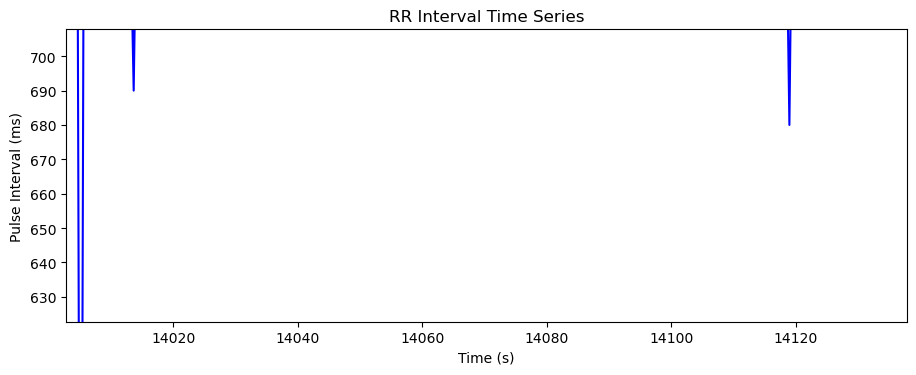

In [16]:
import tkinter as tk
from tkinter import filedialog, messagebox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from scipy.signal import welch
from numpy.lib.stride_tricks import sliding_window_view

def calculate_hrv_features(rr_intervals_ms):
    rr_intervals_s = rr_intervals_ms / 1000.0
    hr = 60.0 / rr_intervals_s
    mean_rr = np.mean(rr_intervals_ms)
    mean_hr = np.mean(hr)
    max_hr = np.max(hr)
    min_hr = np.min(hr)
    rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals_ms))))
    nn50 = np.sum(np.abs(np.diff(rr_intervals_ms)) > 50)
    pnn50 = 100.0 * nn50 / len(rr_intervals_ms)
    sd1 = np.sqrt(np.var(np.diff(rr_intervals_ms)) / 2.0)
    sns_index = np.std(hr) * 10
    pns_index = 100 - sns_index if sns_index <= 100 else 0

    fxx, pxx = welch(rr_intervals_ms, fs=4.0, nperseg=min(256, len(rr_intervals_ms)))
    def bandpower(f, p, band):
        mask = (f >= band[0]) & (f <= band[1])
        power = np.trapz(p[mask], f[mask])
        peak = f[mask][np.argmax(p[mask])] if np.any(mask) else 0
        return power, peak

    power_vlf, peak_vlf = bandpower(fxx, pxx, (0.003, 0.04))
    power_lf, peak_lf = bandpower(fxx, pxx, (0.04, 0.15))
    power_hf, peak_hf = bandpower(fxx, pxx, (0.15, 0.4))
    total_power = power_vlf + power_lf + power_hf
    power_pct_vlf = 100 * power_vlf / total_power if total_power > 0 else 0
    power_log_vlf = np.log(power_vlf + 1e-6)

    def compute_dfa(rr):
        nvals = [4, 16, 64]
        fluctuations = []
        for n in nvals:
            if len(rr) < n:
                fluctuations.append(0)
                continue
            windows = sliding_window_view(rr, window_shape=n)
            local_trends = np.mean(windows, axis=1)
            fluctuation = np.sqrt(np.mean((windows - local_trends[:, None])**2))
            fluctuations.append(fluctuation)
        logs = np.log(fluctuations)
        alphas = np.polyfit(np.log(nvals), logs, 1)[0]
        return alphas, alphas + 0.1

    dfa_alpha1, dfa_alpha2 = compute_dfa(rr_intervals_ms)

    return {
        "Max HR": max_hr,
        "Mean HR": mean_hr,
        "Min HR": min_hr,
        "Mean RR": mean_rr,
        "SNS Index": sns_index,
        "PNS Index": pns_index,
        "SD1": sd1,
        "RMSSD": rmssd,
        "NN50": nn50,
        "pNN50": pnn50,
        "Peak Frequency VLF": peak_vlf,
        "Peak Frequency LF": peak_lf,
        "Peak Frequency HF": peak_hf,
        "Power (%) VLF": power_pct_vlf,
        "Power (log) VLF": power_log_vlf,
        "DFA Alpha1": dfa_alpha1,
        "DFA Alpha2": dfa_alpha2
    }

class RRAnalyzerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("RR Interval Analyzer")
        self.root.geometry("1000x700")
        self.root.configure(bg="#f4f7f9")

        self.file_path = None
        tk.Label(root, text="RR Interval Analyzer", font=("Helvetica", 20, "bold"), fg="#003366", bg="#f4f7f9").pack(pady=15)

        form = tk.Frame(root, bg="#f4f7f9")
        form.pack()
        tk.Label(form, text="Patient ID:", font=("Helvetica", 12), bg="#f4f7f9").grid(row=0, column=0, sticky="e")
        self.entry_id = tk.Entry(form, width=30)
        self.entry_id.grid(row=0, column=1)

        tk.Label(form, text="Patient Name:", font=("Helvetica", 12), bg="#f4f7f9").grid(row=1, column=0, sticky="e")
        self.entry_name = tk.Entry(form, width=30)
        self.entry_name.grid(row=1, column=1)

        tk.Button(root, text="Upload RR Interval File", command=self.upload_file,
                  font=("Helvetica", 12), bg="#0055a5", fg="white").pack(pady=10)

        tk.Button(root, text="Analyze", command=self.analyze,
                  font=("Helvetica", 14, "bold"), bg="#28a745", fg="white").pack(pady=10)

        self.plot_frame = tk.Frame(root, bg="#f4f7f9")
        self.plot_frame.pack(pady=10, fill="both", expand=True)

    def upload_file(self):
        self.file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if self.file_path:
            messagebox.showinfo("File Upload", f"File loaded:\n{self.file_path}")

    def analyze(self):
        try:
            df = pd.read_csv(self.file_path, sep='\t')
            rr_intervals = df['Pulse Interval (ms)'].values
            features = calculate_hrv_features(rr_intervals)

            patient_id = self.entry_id.get().strip()
            patient_name = self.entry_name.get().strip().replace(" ", "_")
            filename = f"{patient_id}_{patient_name}_rr.txt"

            with open(filename, "w") as f:
                f.write("RR Interval Analysis Results\n")
                f.write(f"Patient ID: {patient_id}\n")
                f.write(f"Patient Name: {patient_name.replace('_', ' ')}\n\n")
                for key, val in features.items():
                    f.write(f"{key}: {val:.3f}\n")

            messagebox.showinfo("Saved", f"Results saved to {filename}")

            for widget in self.plot_frame.winfo_children():
                widget.destroy()

            fig, ax = plt.subplots(figsize=(7, 3), dpi=100)
            ax.plot(df['Time (s)'].values, df['Pulse Interval (ms)'].values, color='blue')
            ax.set_title("RR Interval Time Series")
            ax.set_xlabel("Time (s)")
            ax.set_ylabel("Pulse Interval (ms)")
            fig.tight_layout()

            canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
            canvas.draw()
            canvas_widget = canvas.get_tk_widget()
            canvas_widget.pack(fill="both", expand=True)

            toolbar_frame = tk.Frame(self.plot_frame)
            toolbar_frame.pack(side="bottom", fill="x")
            toolbar = NavigationToolbar2Tk(canvas, toolbar_frame)
            toolbar.update()

        except Exception as e:
            messagebox.showerror("Error", str(e))


if __name__ == "__main__":
    root = tk.Tk()
    app = RRAnalyzerApp(root)
    root.mainloop()


## GENERAL GUI

In [15]:
import tkinter as tk
from tkinter import ttk, filedialog, messagebox
import numpy as np
import pandas as pd
import os
import joblib
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from scipy.signal import welch
from numpy.lib.stride_tricks import sliding_window_view
import pyhrv.tools as tools
import pyhrv.time_domain as td
import pyhrv.frequency_domain as fd
import pyhrv.nonlinear as nl

# ------------------------------- Models & Config -------------------------------
MODEL_DIR = "models"

model_options = {
    "Correlation (Top 15)": "Correlation_Top_15",
    "Correlation (Top 5)": "Correlation_Top_5",
    "Random Forest (Top 15)": "Random_Forest_Top_15",
    "Mutual Info (Top 15)": "Mutual_Info_Top_15"
}

logistic_configs = {
    "Correlation (Top 15)": {"intercept": -1.56, "coefficients": [0.9935, -0.8616, -0.3997, 0.4176, 1.3032, 0.6154, -1.0923, -0.7660, 0.0339, 0.5334, -0.3454, 0.2803, -1.2534, -0.0580, -0.0356]},
    "Correlation (Top 5)": {"intercept": -0.98, "coefficients": [0.6911, -0.7299, -0.4806, 0.3434, 0.4582]},
    "Random Forest (Top 15)": {"intercept": -2.13, "coefficients": [-0.8802, 0.0126, -0.1310, 0.5466, 0.7636, -0.3909, 0.5237, -0.0725, -0.0957, 4.2304, -0.0993, -0.2375, 0.2987, -3.9837, 0.2913]},
    "Mutual Info (Top 15)": {"intercept": -4.76, "coefficients": [0.6242, -0.8800, 0.3398, 0.8169, -4.1321, -0.1551, 0.6996, 316.9673, -0.0772, 0.3284, -11.0592, 0.1891, -8.0655, 1.8160, 0.9937]}
}

# ------------------------------- Utility Functions -------------------------------
def load_ann_model(model_key):
    prefix = model_options[model_key]
    model = tf.keras.models.load_model(os.path.join(MODEL_DIR, f"{prefix}_model.h5"))
    scaler = joblib.load(os.path.join(MODEL_DIR, f"{prefix}_scaler.pkl"))
    with open(os.path.join(MODEL_DIR, f"{prefix}_features.txt"), "r") as f:
        features = [line.strip() for line in f.readlines()]
    return model, scaler, features

def predict_ann(file_path, model, scaler, feature_order):
    with open(file_path, "r") as f:
        values = list(map(float, f.read().strip().split()))
    x = np.array(values).reshape(1, -1)
    x_scaled = scaler.transform(x)
    prob = model.predict(x_scaled).ravel()[0]
    label = "Alive (0)" if prob < 0.5 else "Dead (1)"
    return label, prob, values

def predict_logistic(values, model_key):
    config = logistic_configs[model_key]
    intercept = config["intercept"]
    coefs = np.array(config["coefficients"])
    logit = intercept + np.dot(coefs, values)
    prob = 1 / (1 + np.exp(-logit))
    return prob

def analyze_rr_file(rr_path, output_txt):
    try:
        # Try reading as tab-separated first
        try:
            df = pd.read_csv(rr_path, sep="\t")
        except:
            # Fall back to space-separated
            df = pd.read_csv(rr_path, sep="\s+", engine='python')
        
        # Check for required columns
        time_col = next((col for col in df.columns if 'time' in col.lower()), None)
        rr_col = next((col for col in df.columns if 'pulse' in col.lower() or 'rr' in col.lower() or 'interval' in col.lower()), None)
        
        if not time_col or not rr_col:
            raise ValueError("Input file must contain time and RR interval columns")
            
        rr_intervals = df[rr_col].values
        time_points = df[time_col].values
        
        rr_intervals = tools.check_input(rr_intervals)
        time_results = td.time_domain(rr_intervals)
        freq_results = fd.welch_psd(rr_intervals)
        nonlinear_results = nl.nonlinear(rr_intervals)

        with open(output_txt, "w") as f:
            f.write("HRV Features Extracted from RR Intervals\n")
            f.write("\nTime Domain:\n")
            for key, value in time_results.items():
                f.write(f"{key}: {value}\n")
            f.write("\nFrequency Domain:\n")
            for key, value in freq_results.items():
                f.write(f"{key}: {value}\n")
            f.write("\nNonlinear Measures:\n")
            for key, value in nonlinear_results.items():
                f.write(f"{key}: {value}\n")

        return df, time_col, rr_col
    except Exception as e:
        raise ValueError(f"Error processing RR file: {str(e)}")

# ------------------------------- GUI Classes -------------------------------
class ICUApp(ttk.Frame):
    def __init__(self, parent):
        super().__init__(parent)
        self.file_path = None
        self.rr_path = None
        self.canvas = None
        self.toolbar = None
        self.build_ui()

    def build_ui(self):
        tk.Label(self, text="ICU Survival Prediction", font=("Helvetica", 24, "bold"), fg="#003366").pack(pady=15)
        form = tk.Frame(self)
        form.pack()
        tk.Label(form, text="Patient ID:", font=("Helvetica", 12)).grid(row=0, column=0, sticky="e")
        self.id_entry = tk.Entry(form, width=30)
        self.id_entry.grid(row=0, column=1)
        tk.Label(form, text="Patient Name:", font=("Helvetica", 12)).grid(row=1, column=0, sticky="e")
        self.name_entry = tk.Entry(form, width=30)
        self.name_entry.grid(row=1, column=1)
        tk.Label(form, text="Model:", font=("Helvetica", 12)).grid(row=2, column=0, sticky="e")
        self.model_var = tk.StringVar()
        model_dropdown = ttk.Combobox(form, textvariable=self.model_var, values=list(model_options.keys()), state="readonly", width=28)
        model_dropdown.grid(row=2, column=1)
        model_dropdown.set("Correlation (Top 15)")

        tk.Button(self, text="Upload Clinical File (.txt)", command=self.upload_clinical_file).pack(pady=5)
        tk.Button(self, text="Upload RR File (.txt)", command=self.upload_rr_file).pack(pady=5)
        tk.Button(self, text="Analyze", command=self.analyze).pack(pady=10)
        self.result_label = tk.Label(self, text="", font=("Helvetica", 14), fg="darkred")
        self.result_label.pack()
        self.log_label = tk.Label(self, text="", font=("Helvetica", 14), fg="darkblue")
        self.log_label.pack()

    def upload_clinical_file(self):
        self.file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        messagebox.showinfo("File Upload", "Clinical variable file loaded.")

    def upload_rr_file(self):
        self.rr_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if self.rr_path:
            try:
                patient_id = self.id_entry.get().strip()
                patient_name = self.name_entry.get().strip().replace(" ", "_")
                rr_out = f"{patient_id}_{patient_name}_rr.txt"
                
                # Clear previous plot if exists
                if self.canvas:
                    self.canvas.get_tk_widget().destroy()
                    self.toolbar.destroy()
                
                # Analyze and plot
                df_rr, time_col, rr_col = analyze_rr_file(self.rr_path, rr_out)

                # Create plot
                fig, ax = plt.subplots(figsize=(7, 3))
                ax.plot(df_rr[time_col], df_rr[rr_col])
                ax.set_title("RR Interval Time Series")
                ax.set_xlabel(time_col)
                ax.set_ylabel(rr_col)
                
                # Embed plot in GUI
                self.canvas = FigureCanvasTkAgg(fig, master=self)
                self.canvas.draw()
                self.canvas.get_tk_widget().pack(pady=10)
                
                # Add toolbar
                self.toolbar = NavigationToolbar2Tk(self.canvas, self)
                self.toolbar.update()
                self.canvas.get_tk_widget().pack()

                messagebox.showinfo("RR Analysis", f"RR interval analysis saved to:\n{rr_out}")
            except Exception as e:
                messagebox.showerror("Error", f"Failed to process RR file: {str(e)}")

    def analyze(self):
        try:
            if not self.file_path:
                raise ValueError("Please upload a clinical file first")
                
            model_key = self.model_var.get()
            patient_name = self.name_entry.get().strip().replace(" ", "_")
            patient_id = self.id_entry.get().strip()
            model, scaler, features = load_ann_model(model_key)
            label, ann_prob, values = predict_ann(self.file_path, model, scaler, features)
            log_prob = predict_logistic(values, model_key)

            self.result_label.config(text=f"ANN Prediction: {label} (Survival Probability: {ann_prob*100:.2f}%)")
        except Exception as e:
            messagebox.showerror("Error", str(e))

class RRAnalyzerApp(ttk.Frame):
    def __init__(self, parent):
        super().__init__(parent)
        self.file_path = None
        self.canvas = None
        self.toolbar = None
        self.build_ui()

    def build_ui(self):
        tk.Label(self, text="RR Interval Analyzer", font=("Helvetica", 20, "bold")).pack(pady=15)
        form = tk.Frame(self)
        form.pack()
        tk.Label(form, text="Patient ID:", font=("Helvetica", 12)).grid(row=0, column=0)
        self.entry_id = tk.Entry(form, width=30)
        self.entry_id.grid(row=0, column=1)
        tk.Label(form, text="Patient Name:", font=("Helvetica", 12)).grid(row=1, column=0)
        self.entry_name = tk.Entry(form, width=30)
        self.entry_name.grid(row=1, column=1)
        tk.Button(self, text="Upload RR Interval File", command=self.upload_file).pack(pady=5)
        tk.Button(self, text="Analyze", command=self.analyze).pack(pady=5)
        self.plot_frame = tk.Frame(self)
        self.plot_frame.pack(pady=10, fill="both", expand=True)

    def upload_file(self):
        self.file_path = filedialog.askopenfilename(filetypes=[("Text files", "*.txt")])
        if self.file_path:
            messagebox.showinfo("File Upload", f"File loaded:\n{self.file_path}")

    def analyze(self):
        try:
            if not self.file_path:
                raise ValueError("Please upload an RR interval file first")
                
            # Try reading as tab-separated first
            try:
                df = pd.read_csv(self.file_path, sep="\t")
            except:
                # Fall back to space-separated
                df = pd.read_csv(self.file_path, sep="\s+", engine='python')
            
            # Check for required columns
            time_col = next((col for col in df.columns if 'time' in col.lower()), None)
            rr_col = next((col for col in df.columns if 'pulse' in col.lower() or 'rr' in col.lower() or 'interval' in col.lower()), None)
            
            if not time_col or not rr_col:
                raise ValueError("Input file must contain time and RR interval columns")
                
            patient_id = self.entry_id.get().strip()
            patient_name = self.entry_name.get().strip().replace(" ", "_")
            filename = f"{patient_id}_{patient_name}_rr.txt"

            rr_intervals = df[rr_col].values
            rr_intervals = tools.check_input(rr_intervals)
            
            time_results = td.time_domain(rr_intervals)
            freq_results = fd.welch_psd(rr_intervals)
            nonlinear_results = nl.nonlinear(rr_intervals)

            with open(filename, "w") as f:
                f.write(f"Patient ID: {patient_id}\nPatient Name: {patient_name}\n\n")
                f.write("Time Domain:\n")
                for k, v in time_results.items():
                    f.write(f"{k}: {v}\n")
                f.write("\nFrequency Domain:\n")
                for k, v in freq_results.items():
                    f.write(f"{k}: {v}\n")
                f.write("\nNonlinear Measures:\n")
                for k, v in nonlinear_results.items():
                    f.write(f"{k}: {v}\n")

            # Clear previous plot if exists
            for widget in self.plot_frame.winfo_children():
                widget.destroy()

            # Create new plot
            fig, ax = plt.subplots(figsize=(7, 3))
            ax.plot(df[time_col], df[rr_col], color="blue")
            ax.set_title("RR Interval Time Series")
            ax.set_xlabel(time_col)
            ax.set_ylabel(rr_col)
            
            # Embed plot in GUI
            canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
            canvas.draw()
            canvas.get_tk_widget().pack(fill="both", expand=True)
            
            # Add toolbar
            toolbar = NavigationToolbar2Tk(canvas, self.plot_frame)
            toolbar.update()
            
        except Exception as e:
            messagebox.showerror("Error", str(e))

# ------------------------------- Main App Runner -------------------------------
if __name__ == "__main__":
    root = tk.Tk()
    root.title("ICU Survival & RR Interval Analyzer")
    root.geometry("1024x860")
    notebook = ttk.Notebook(root)
    notebook.pack(expand=1, fill="both")

    tab1 = ICUApp(notebook)
    tab2 = RRAnalyzerApp(notebook)
    notebook.add(tab1, text="ICU Prediction")
    notebook.add(tab2, text="RR Interval Analyzer")

    root.mainloop()